In [2]:
%load_ext autoreload
%autoreload

import pandas as pd
import numpy as np

pd.options.display.float_format = "{:.2f}".format
np.set_printoptions(precision=4)

import matplotlib.pyplot as plt
%matplotlib inline

### TRAIN
        the train set, containing the user ids and whether they have churned.
        Churn is defined as whether the user did not continue the subscription within 30 days of expiration. 
        is_churn = 1 means churn,
        is_churn = 0 means renewal.

In [3]:
train_input = pd.read_csv('/home/dissertation/data/train_v2.csv', 
                          dtype = {'msno' : 'category'})
train_input.head()

,msno,is_churn
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1


In [4]:
## The percentage of churners is?
print("The percentage of churners is: {0:.4f}".format(np.mean(train_input.is_churn)))
train_input.is_churn.value_counts()

The percentage of churners is: 0.0899


0    883630
1     87330
Name: is_churn, dtype: int64

 0    883630
1     87330
Name: is_churn, dtype: int64


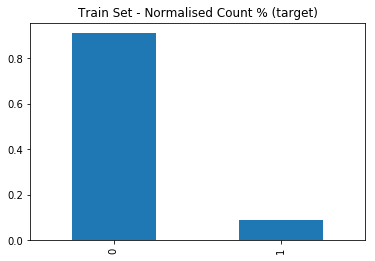

In [5]:
train_input.is_churn.value_counts(dropna=False, normalize=True).plot(kind='bar', title='Train Set - Normalised Count % (target)')
print("",train_input.is_churn.value_counts())

So we have churn records for 970960 members

### MEMBERS

In [6]:
members_input = pd.read_csv('/home/dissertation/data/members_v3.csv',
                            dtype={'registered_via' : np.uint8,
                                   'gender' : str,
                                   'city' : 'category',
                                   'registered_via' : 'category'})

In [7]:
members_input['registration_init_time_dt'] = pd.to_datetime(members_input['registration_init_time'], 
                                                            format='%Y%m%d', errors='ignore')

In [ ]:
members_input.head()

#### Adding a membership_months feature

In [8]:
## Adding in a member for time period
## Max transation date will be used as end period. That date is: 2017-02-28

members_input['membership_months'] = (pd.datetime(2017,2, 28) - members_input['registration_init_time_dt']) 
                                                    / np.timedelta64(1, 'M')
members_input['membership_months'] = members_input['membership_months'].astype(int)

IndentationError: unexpected indent (<ipython-input-8-7b3a905688a5>, line 5)

#### Mapping all missing gender to 'unknown' category

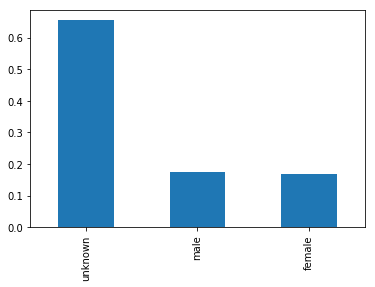

In [9]:
members_input['gender'] = members_input['gender'].fillna(value='unknown')
members_input.gender.value_counts(normalize=True).plot(kind='bar')

#### Map outliers in BD

{'whiskers': [<matplotlib.lines.Line2D at 0x7fee8d2f9320>,
 'caps': [<matplotlib.lines.Line2D at 0x7fee8d2f94a8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fee8d2f9f60>],
 'medians': [<matplotlib.lines.Line2D at 0x7fee696fff28>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fee696ff208>],
 'means': []}

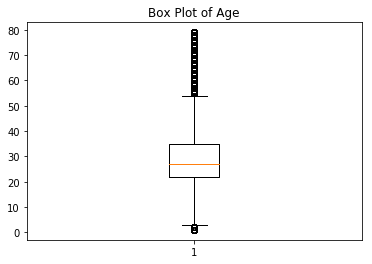

In [10]:
fig1, ax1 = plt.subplots()
ax1.set_title('Box Plot of Age')
ax1.boxplot(members_input[((members_input.bd > 0) & (members_input.bd < 80))]['bd'])

In [12]:
members_input['age_cat'] = members_input['bd']
members_input.loc[~members_input.age_cat.between(1,80), 'age_cat'] = 0
members_input['age_cat'] = members_input['age_cat'].astype(str)

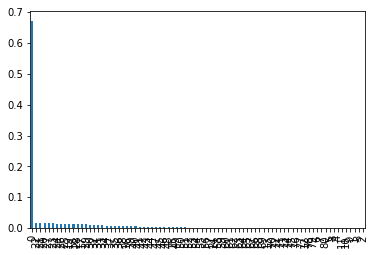

In [13]:
members_input.age_cat.value_counts(normalize=True).plot(kind='bar')

In [14]:
members_input.describe(include='all')

,msno,city,bd,gender,registered_via,registration_init_time,registration_init_time_dt,age_cat
count,6769473,6769473,6769473.00,6769473,6769473,6769473.00,6769473,6769473
unique,6769473,21,nan,3,18,nan,4782,81
top,GpZOo/1tmZN9JRPtaP/KMuNXNElTzPf/1f1kzupcFIk=,1,nan,unknown,4,nan,2015-10-09 00:00:00,0
freq,1,4804326,nan,4429505,2793213,nan,12413,4549659
first,NaN,NaN,nan,NaN,NaN,nan,2004-03-26 00:00:00,NaN
last,NaN,NaN,nan,NaN,NaN,nan,2017-04-29 00:00:00,NaN
mean,NaN,NaN,9.80,NaN,NaN,20145175.91,NaN,NaN
std,NaN,NaN,17.93,NaN,NaN,23186.01,NaN,NaN
min,NaN,NaN,-7168.00,NaN,NaN,20040326.00,NaN,NaN
25%,NaN,NaN,0.00,NaN,NaN,20140422.00,NaN,NaN


    bd/age_cat is an issue. 
    gender is also an issue.

    It may be better to drop them or remove the poor instances.

#### Categorical Features

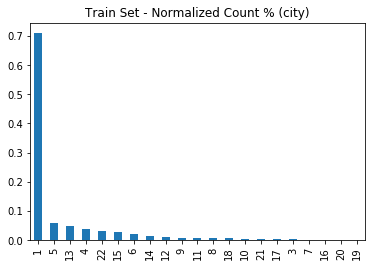

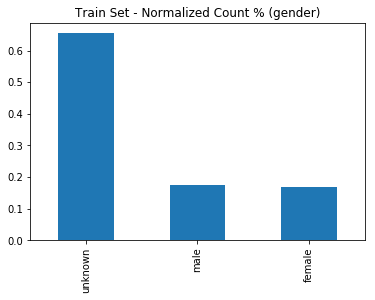

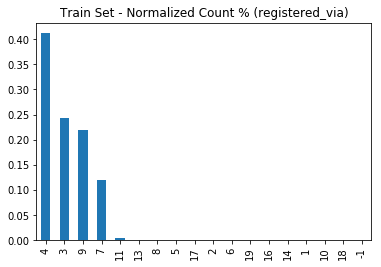

In [15]:
for idx, col in enumerate(['city','gender','registered_via']):
    plt.figure()
    members_input[col].value_counts(dropna=False, normalize=True).plot(kind='bar', title='Train Set - Normalized Count % ({0})'.format(col))

#### Notes:
    msno: 6769473 members in total in the system.
    city [1] is by far the most active city in terms of memberships (~ 70%)
    A large portion (>60%) of gender information is missing
    There are 4 main popular approaches to registering, [4, 3, 9, 7]. The rest are minimal

#### TRANSACTIONS

In [16]:
## Next load in the transactions data
transactions_input = pd.read_csv('/home/dissertation/data/transactions.csv',
                                 dtype = {'payment_method' : 'category',
                                          'payment_plan_days' : np.uint8,
                                          'plan_list_price' : np.uint8,
                                          'actual_amount_paid': np.uint8,
                                          'is_auto_renew' : np.bool,
                                          'is_cancel' : np.bool})
transactions_input.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,YyO+tlZtAXYXoZhNr3Vg3+dfVQvrBVGO8j1mfqe4ZHc=,41,30,129,129,True,20150930,20151101,False
1,AZtu6Wl0gPojrEQYB8Q3vBSmE2wnZ3hi1FbK1rQQ0A4=,41,30,149,149,True,20150930,20151031,False
2,UkDFI97Qb6+s2LWcijVVv4rMAsORbVDT2wNXF0aVbns=,41,30,129,129,True,20150930,20160427,False
3,M1C56ijxozNaGD0t2h68PnH2xtx5iO5iR2MVYQB6nBI=,39,30,149,149,True,20150930,20151128,False
4,yvj6zyBUaqdbUQSrKsrZ+xNDVM62knauSZJzakS9OW4=,39,30,149,149,True,20150930,20151121,False


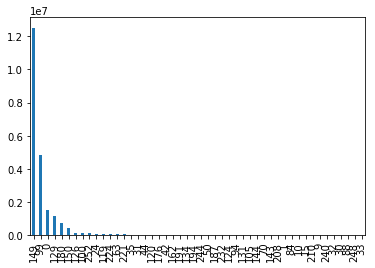

In [17]:
transactions_input.plan_list_price.value_counts().plot(kind='bar')

In [18]:
transactions_input.describe(include='all')

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
count,21547746,21547746.00,21547746.00,21547746.00,21547746.00,21547746,21547746.00,21547746.00,21547746
unique,2363626,nan,nan,nan,nan,2,nan,nan,2
top,xm6fmAfgZx1OYUXaJuHOObD0H2EAtIktv9NYIVlaTf4=,nan,nan,nan,nan,True,nan,nan,False
freq,71,nan,nan,nan,nan,18357950,nan,nan,20690895
mean,NaN,38.93,30.15,127.05,128.65,NaN,20157597.16,20158624.78,NaN
std,NaN,3.51,18.30,42.32,39.57,NaN,6155.98,7755.75,NaN
min,NaN,1.00,0.00,0.00,0.00,NaN,20150101.00,19700101.00,NaN
25%,NaN,38.00,30.00,99.00,99.00,NaN,20150906.00,20151019.00,NaN
50%,NaN,41.00,30.00,149.00,149.00,NaN,20160321.00,20160430.00,NaN
75%,NaN,41.00,30.00,149.00,149.00,NaN,20160925.00,20161031.00,NaN


(array([1.1970e+06, 9.1000e+01, 5.0000e+01, 0.0000e+00, 4.4805e+04,
        6.0000e+00, 1.4370e+04, 0.0000e+00, 1.1274e+04, 1.0560e+03,
        0.0000e+00, 0.0000e+00, 1.2086e+04, 2.5000e+02, 0.0000e+00,
        0.0000e+00, 7.7000e+01, 3.0000e+00, 6.0600e+02, 4.9362e+06,
        3.7400e+02, 0.0000e+00, 0.0000e+00, 3.6003e+05, 5.9900e+02,
        1.2889e+06, 4.8070e+03, 0.0000e+00, 4.9400e+02, 1.2857e+07,
        0.0000e+00, 0.0000e+00, 5.1210e+03, 0.0000e+00, 5.5260e+03,
        6.8006e+05, 0.0000e+00, 5.2880e+03, 1.5010e+03, 0.0000e+00,
        0.0000e+00, 1.4800e+02, 0.0000e+00, 1.0847e+04, 2.3170e+04,
        0.0000e+00, 7.8300e+02, 1.3000e+01, 1.2110e+03, 8.3995e+04]),
 array([  0.  ,   5.04,  10.08,  15.12,  20.16,  25.2 ,  30.24,  35.28,
         40.32,  45.36,  50.4 ,  55.44,  60.48,  65.52,  70.56,  75.6 ,
         80.64,  85.68,  90.72,  95.76, 100.8 , 105.84, 110.88, 115.92,
        120.96, 126.  , 131.04, 136.08, 141.12, 146.16, 151.2 , 156.24,
        161.28, 166.32, 171.36

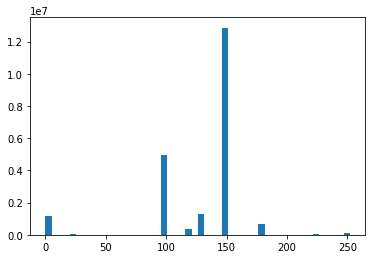

In [19]:
plt.hist(transactions_input.actual_amount_paid, bins=50)

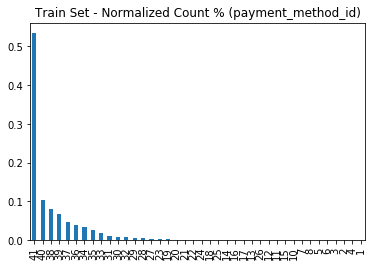

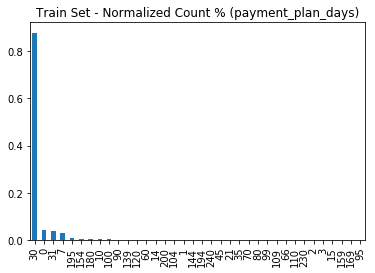

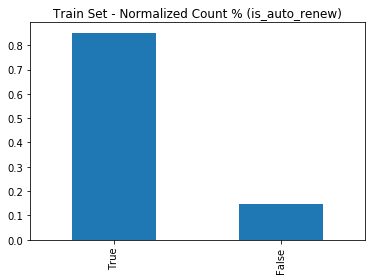

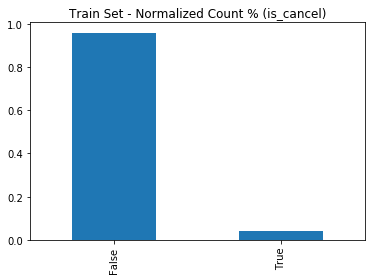

In [20]:
for idx, col in enumerate(['payment_method_id','payment_plan_days','is_auto_renew','is_cancel']):
    plt.figure()
    transactions_input[col].value_counts(dropna=False, normalize=True).plot(kind='bar', title='Train Set - Normalized Count % ({0})'.format(col))

#### Notes:
    payment_method_id 41 accounts for >50% of all payment types
    most transactions are for 30 day plans
    >85% of customers opt to auto_renew 
    >90% have not cancelled their subscription
    149.00 is the most common payment plan

### Merging train_input and members

In [21]:
merged_input = pd.merge(left=train_input, right=members_input, how='inner', on=['msno'])
merged_input.head()

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,registration_init_time_dt,age_cat
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5,28,male,3,20131223,2013-12-23,28
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1,13,20,male,3,20131223,2013-12-23,20
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,13,18,male,3,20131227,2013-12-27,18
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,1,0,unknown,7,20140109,2014-01-09,0
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1,13,35,female,7,20140125,2014-01-25,35


In [22]:
merged_input.describe(include='all')

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,registration_init_time_dt,age_cat
count,860967,860967.00,860967,860967.00,860967,860967,860967.00,860967,860967
unique,860967,nan,21,nan,3,5,nan,4749,81
top,ymdSpD9GF2AZT0mab2q1cXaLTYk4asgmjfqvY4VHC9o=,nan,1,nan,unknown,7,nan,2015-10-09 00:00:00,0
freq,1,nan,442598,nan,472062,462684,nan,1575,474471
first,NaN,nan,NaN,nan,NaN,NaN,nan,2004-03-26 00:00:00,NaN
last,NaN,nan,NaN,nan,NaN,NaN,nan,2017-04-24 00:00:00,NaN
mean,NaN,0.09,NaN,13.58,NaN,NaN,20132648.96,NaN,NaN
std,NaN,0.29,NaN,20.06,NaN,NaN,30111.74,NaN,NaN
min,NaN,0.00,NaN,-3152.00,NaN,NaN,20040326.00,NaN,NaN
25%,NaN,0.00,NaN,0.00,NaN,NaN,20120214.00,NaN,NaN


is_churn,0,1
gender,,
female,0.19,0.03
male,0.21,0.03
unknown,0.51,0.04


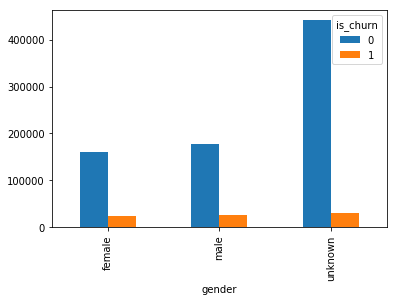

In [23]:
merged_input['gender'] = merged_input['gender'].astype(str)
pd.crosstab(merged_input['gender'].fillna('missing'), 
            merged_input['is_churn'].fillna('missing')).plot(kind='bar')
pd.crosstab(merged_input['gender'].fillna('missing'), 
            merged_input['is_churn'].fillna('missing'), normalize=True)

### Merging Transactions with those members involved in the churn study

In [24]:
transactions_merged = pd.merge(left = merged_input[['msno']], 
                               right = transactions_input, 
                               how='inner', 
                               on='msno')
transactions_merged.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,38,30,149,149,False,20170228,20170330,False
1,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,31,0,0,149,True,20150331,20150430,False
2,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,31,0,0,149,True,20150630,20150731,False
3,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,31,30,149,149,True,20150902,20150901,True
4,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,31,0,0,149,True,20150831,20150930,False


In [25]:
transactions_merged[transactions_merged.msno == 'ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=']

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,38,30,149,149,False,20170228,20170330,False
1,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,31,0,0,149,True,20150331,20150430,False
2,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,31,0,0,149,True,20150630,20150731,False
3,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,31,30,149,149,True,20150902,20150901,True
4,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,31,0,0,149,True,20150831,20150930,False
5,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,31,0,0,149,True,20150731,20150831,False


In [26]:
%%time
#[transactions_merged.msno == 'ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=']\

transactions_merged[transactions_merged.msno == 'ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=']\
        .groupby('msno')\
        .agg({'msno' : {'total_order' : 'count'},
                        'payment_method_id' : {'payment_method_id_mode' : lambda x: x.mode()[0],
                                               'payment_method_id_count' : lambda x: len(np.unique(x))},
                        'payment_plan_days' : {'payment_plan_days_mode' : lambda x: x[x>0].mode()[0],
                                               'payment_plan_days_mean' : 'mean'},
                        'plan_list_price' : {'plan_list_price_mean' : 'mean',
                                             'plan_lifetime_value' : 'sum'},
                        'actual_amount_paid' : {'actual_amount_mean' : 'mean',
                                                'total_actual_amount' : 'sum'},
                        'is_auto_renew' : {'is_auto_renew_mode' : lambda x : x.mode()[0]},
                        'transaction_date' : {'transaction_date_min' : lambda x: x.min(),
                                              'transaction_date_max' : lambda x: x.max()},
                        'is_cancel' : {'cancel_times' : lambda x : sum(x==1)}
            })

CPU times: user 1.02 s, sys: 15.9 ms, total: 1.03 s
Wall time: 662 ms


/home/anaconda/lib/python3.7/site-packages/pandas/core/groupby/generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


msno  \
                                             total_order   
msno                                                       
ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=           6   

                                                  payment_method_id  \
                                             payment_method_id_mode   
msno                                                                  
ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=                     31   

                                                                      \
                                             payment_method_id_count   
msno                                                                   
ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=                       2   

                                                  payment_plan_days  \
                                             payment_plan_days_mode   
msno                                                                  
ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=                     30   

                                                                     \
                                             payment_plan_days_mean   
msno                                                                  
ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=                     10   

                                                  plan_list_price  \
                                             plan_list_price_mean   
msno                                                                
ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=                49.67   

                                                                  \
                                             plan_lifetime_value   
msno                                                               
ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=              298.00   

                                             actual_amount_paid  \
                                             actual_amount_mean   
msno                                                              
ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=                149   

                                                                  \
                                             total_actual_amount   
msno                                                               
ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=              894.00   

                                                  is_auto_renew  \
                                             is_auto_renew_mode   
msno                                                              
ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=               True   

                                                 transaction_date  \
                                             transaction_date_min   
msno                                                                
ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=             20150331   

                                                                     is_cancel  
                                             transaction_date_max cancel_times  
msno                                                                            
ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=             20170228         True

In [27]:
transactions_summary = \
    transactions_merged\
            .groupby('msno')\
            .agg({'msno' : {'total_order' : 'count'},
                            'payment_method_id' : {'payment_method_id_mode' : lambda x: x.mode()[0] if len(x) > 1 else x,
                                                   'payment_method_id_count' : lambda x: len(np.unique(x))},
                            'payment_plan_days' : {'payment_plan_days_mode' : lambda x: x.mode()[0] if len(x) > 1 else x
                                                   ,
                                                   'payment_plan_days_mean' : 'mean'},
                            'plan_list_price' : {'plan_list_price_mean' : 'mean',
                                                 'plan_lifetime_value' : 'sum'},
                            'actual_amount_paid' : {'actual_amount_mean' : 'mean',
                                                    'total_actual_amount' : 'sum'},
                            'is_auto_renew' : {'is_auto_renew_mode' : lambda x : x.mode()[0] if len(x) > 1 else x},
                            'transaction_date' : {'transaction_date_min' : lambda x: x.min(),
                                                  'transaction_date_max' : lambda x: x.max()},
                            'is_cancel' : {'cancel_times' : lambda x : sum(x==1)}
                })
        
transactions_summary.columns = transactions_summary.columns.droplevel(0)
transactions_summary.reset_index(inplace=True)

In [28]:
transactions_summary['transaction_date_min'] = pd.to_datetime(transactions_summary['transaction_date_min'], 
                                                              format='%Y%m%d', errors='ignore')
transactions_summary['transaction_date_max'] = pd.to_datetime(transactions_summary['transaction_date_max'], 
                                                              format='%Y%m%d', errors='ignore')
transactions_summary['transaction_date_delta'] =  (transactions_summary.transaction_date_max - transactions_summary.transaction_date_min) / pd.offsets.Day(1)
#transaction.drop(['transaction_date_min', 'transaction_date_max'], axis=1, inplace=True)


In [29]:
transactions_summary = transactions_summary[~transactions_summary.is_auto_renew_mode.isnull()]
len(transactions_summary)

858935

In [30]:
transactions_summary.head()

,msno,total_order,payment_method_id_mode,payment_method_id_count,payment_plan_days_mode,payment_plan_days_mean,plan_list_price_mean,plan_lifetime_value,actual_amount_mean,total_actual_amount,is_auto_renew_mode,transaction_date_min,transaction_date_max,cancel_times,transaction_date_delta
0,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,4,41,1,30,30.00,99.00,396.00,99.00,396.00,True,2016-11-16,2017-02-15,0,91.00
1,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,19,39,1,30,28.58,141.16,2682.00,149.00,2831.00,True,2015-01-31,2017-01-31,0,731.00
2,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,26,41,1,30,28.85,143.27,3725.00,149.00,3874.00,True,2015-01-26,2017-02-26,0,762.00
3,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,12,41,1,30,30.00,149.00,1788.00,149.00,1788.00,True,2016-03-15,2017-02-15,0,337.00
4,++/UDNo9DLrxT8QVGiDi1OnWfczAdEwThaVyD0fXO50=,19,39,1,30,28.58,141.16,2682.00,149.00,2831.00,True,2015-01-31,2017-01-31,0,731.00


In [ ]:
transactions_summary.to_hdf('/home/dissertation/data/transactions_summary.h5', key='transactions_summary', mode='w')

In [ ]:
transactions_summary = pd.read_hdf('/home/dissertation/data/transactions_summary.h5', 'transactions_summary')

In [31]:
data_prepared = pd.merge(left = merged_input, 
                         right = transactions_summary,
                         how='inner',
                         on='msno')
print(len(data_prepared))
transactions_summary.is_auto_renew_mode = transactions_summary.is_auto_renew_mode.astype(bool)
data_prepared.head()

858935


,msno,is_churn,city,bd,gender,registered_via,registration_init_time,registration_init_time_dt,age_cat,total_order,...,payment_plan_days_mean,plan_list_price_mean,plan_lifetime_value,actual_amount_mean,total_actual_amount,is_auto_renew_mode,transaction_date_min,transaction_date_max,cancel_times,transaction_date_delta
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5,28,male,3,20131223,2013-12-23,28,6,...,10.00,49.67,298.00,149.00,894.00,True,2015-03-31,2017-02-28,1,700.00
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1,13,20,male,3,20131223,2013-12-23,20,5,...,25.40,125.40,627.00,125.40,627.00,False,2016-03-03,2017-02-10,0,344.00
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,13,18,male,3,20131227,2013-12-27,18,18,...,30.00,149.00,2682.00,149.00,2682.00,False,2015-08-19,2017-01-30,0,530.00
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,1,0,unknown,7,20140109,2014-01-09,0,19,...,25.63,125.47,2384.00,141.16,2682.00,True,2015-01-08,2016-02-25,3,413.00
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1,13,35,female,7,20140125,2014-01-25,35,24,...,26.25,105.38,2529.00,123.17,2956.00,True,2015-01-24,2016-09-01,2,586.00


In [ ]:
pd.crosstab(data_prepared['is_auto_renew_mode'].fillna('missing'), 
            data_prepared['is_churn'].fillna('missing')).plot(kind='bar')
pd.crosstab(data_prepared['is_auto_renew_mode'].fillna('missing'), 
            data_prepared['is_churn'].fillna('missing'), normalize=True)

In [ ]:
import seaborn as sns

# calculate the correlation matrix using spearman as some of the distributions are not normal.
df_corr = data_prepared[[
                     'membership_months', 'age_cat', 'payment_method_id_count',\
                     'payment_plan_days_mean', 'plan_list_price_mean', 'plan_lifetime_value',\
                     'actual_amount_mean', 'total_actual_amount',\
                     'cancel_times',\
                     'transaction_date_delta']]\
                .corr('spearman')

fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(df_corr, xticklabels=df_corr.columns, yticklabels=df_corr.columns, annot=True)

## Write out the modified dataset to the HDF5 store

In [33]:
data_prepared.to_hdf('/home/dissertation/data/feat_eng_abt.h5', key='feat_eng_abt', mode='w', format="table")